# 导入相关软件包

In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from scipy.stats import entropy
from sklearn.metrics import accuracy_score

In [2]:
# 随机种子
def seed_pytorch(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

# 参数配置

In [3]:
config_para = {
    'seed':42,
}

In [4]:
sns.set(style="whitegrid")

seed_pytorch(seed=config_para['seed'])

# 数据读入

In [5]:
# 定义西瓜数据集4.0的数据，这里把类别信息也读了进来，为了后续更好评估
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
           21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'density': [0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666, 0.243,
           0.245, 0.343, 0.639, 0.657, 0.360, 0.593, 0.719, 0.359, 0.339, 0.282,
           0.748, 0.714, 0.483, 0.478, 0.525, 0.751, 0.532, 0.473, 0.725, 0.446],
    'sugar_rate': [0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091, 0.267,
           0.057, 0.099, 0.161, 0.198, 0.370, 0.042, 0.103, 0.188, 0.241, 0.257,
           0.232, 0.346, 0.312, 0.437, 0.369, 0.489, 0.472, 0.376, 0.445, 0.459],
    'is_good': [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                1, 1, 1, 1, 1, 1, 1, 1]
}

In [6]:
# 创建DataFrame
df = pd.DataFrame(data)
df

,id,density,sugar_rate,is_good
0,1,0.697,0.460,1
1,2,0.774,0.376,1
2,3,0.634,0.264,1
3,4,0.608,0.318,1
4,5,0.556,0.215,1
5,6,0.403,0.237,1
6,7,0.481,0.149,1
7,8,0.437,0.211,1
8,9,0.666,0.091,0
9,10,0.243,0.267,0


In [7]:
# # 将中文类别映射为数字label，这里直接设的0和1，跳过该步骤
# mapping = { # 映射字典
#     'is_good': {'否': 0, '是': 1}
# }

# # 编码
# for column, map_dict in mapping.items():
#     df[column] = df[column].map(map_dict)
    
# 去除 "编号" 列
df = df.drop(['id'], axis=1)

In [8]:
df

,density,sugar_rate,is_good
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1
5,0.403,0.237,1
6,0.481,0.149,1
7,0.437,0.211,1
8,0.666,0.091,0
9,0.243,0.267,0


# 可视化和探索性数据分析

In [9]:
# 数据集基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   density     30 non-null     float64
 1   sugar_rate  30 non-null     float64
 2   is_good     30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [10]:
# 数据集统计描述
df.describe()

,density,sugar_rate,is_good
count,30.000000,30.00000,30.000000
mean,0.530333,0.27470,0.566667
std,0.161518,0.13204,0.504007
min,0.243000,0.04200,0.000000
25%,0.411500,0.19050,0.000000
50%,0.528500,0.26050,1.000000
75%,0.663750,0.37450,1.000000
max,0.774000,0.48900,1.000000


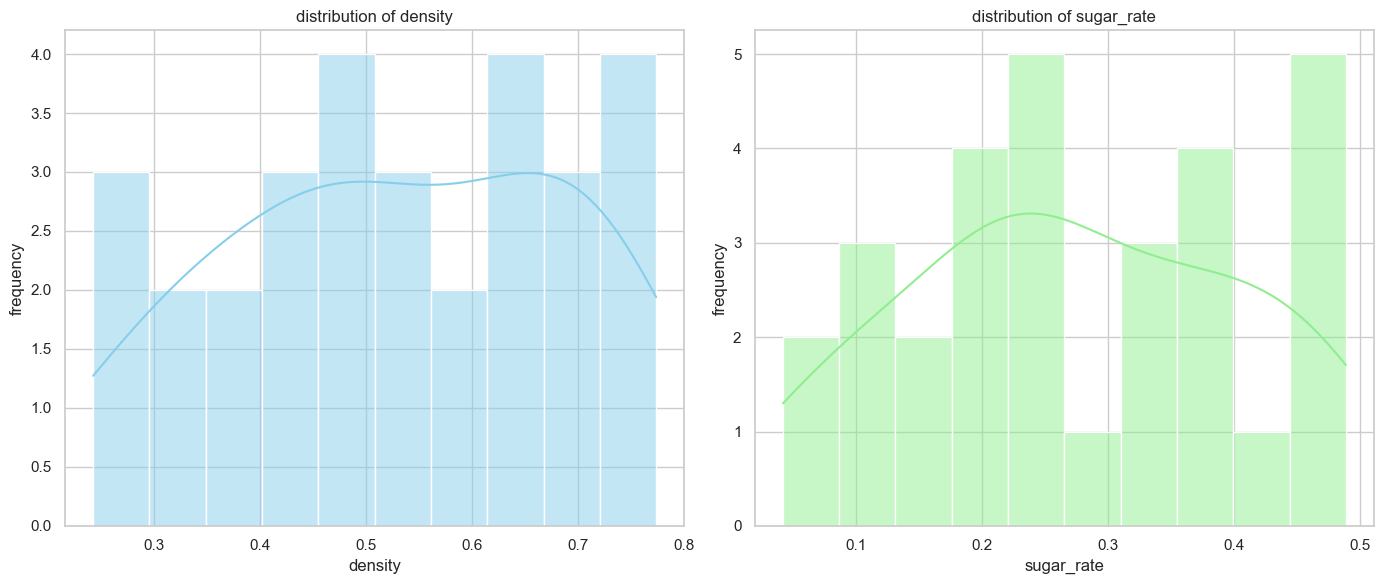

In [11]:
# 直方图和kde图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 创建1行2列的子图

# density 的分布
sns.histplot(df['density'], bins=10, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('distribution of density')
axes[0].set_xlabel('density')
axes[0].set_ylabel('frequency')

# sugar_rate 的分布
sns.histplot(df['sugar_rate'], bins=10, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title('distribution of sugar_rate')
axes[1].set_xlabel('sugar_rate')
axes[1].set_ylabel('frequency')

# 调整子图布局
plt.tight_layout()
plt.show()

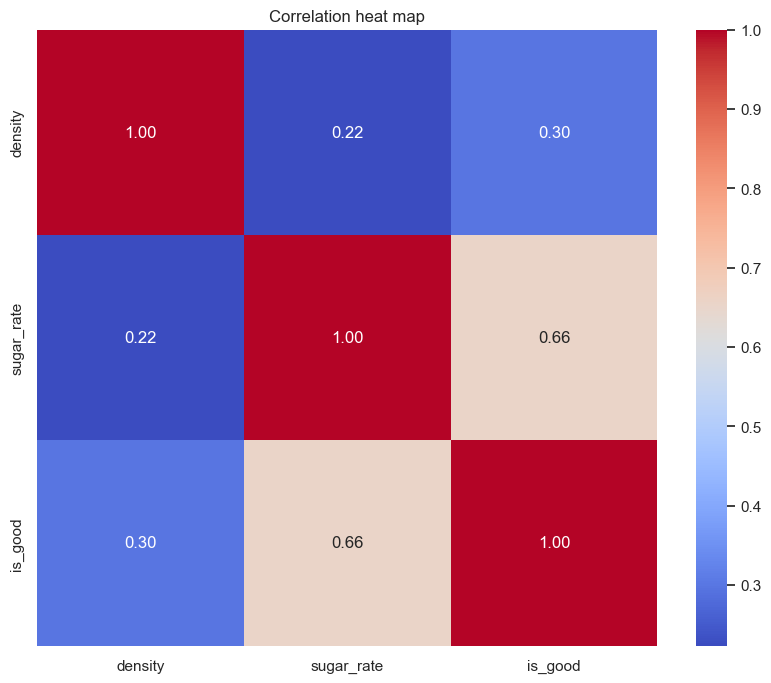

In [12]:
# 特征相关性热图
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heat map')
plt.show()

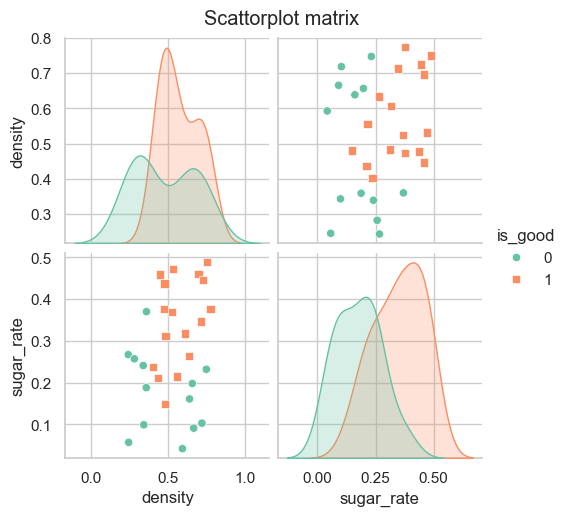

In [13]:
# 散点图矩阵

sns.pairplot(df, hue='is_good', palette='Set2', markers=["o", "s"])
plt.suptitle('Scattorplot matrix', y=1.02)
plt.show()

C:\Users\Jiazhen Huang\AppData\Local\Temp\ipykernel_37520\3009839429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_good', y='sugar_rate', data=df, palette='Set2', ax=axes[0])
C:\Users\Jiazhen Huang\AppData\Local\Temp\ipykernel_37520\3009839429.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_good', y='density', data=df, palette='Set3', ax=axes[1])


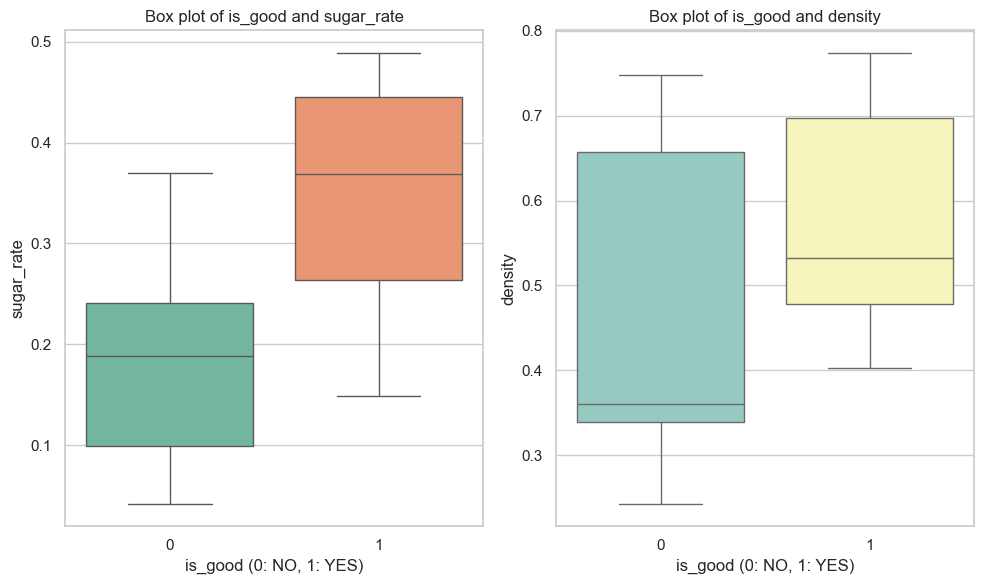

In [14]:
# 箱线图
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# is_good与sugar_rate
sns.boxplot(x='is_good', y='sugar_rate', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Box plot of is_good and sugar_rate')
axes[0].set_xlabel('is_good (0: NO, 1: YES)')
axes[0].set_ylabel('sugar_rate')

# is_good与density
sns.boxplot(x='is_good', y='density', data=df, palette='Set3', ax=axes[1])
axes[1].set_title('Box plot of is_good and density')
axes[1].set_xlabel('is_good (0: NO, 1: YES)')
axes[1].set_ylabel('density')

# 调整子图布局
plt.tight_layout()
plt.show()

# 数据处理与加载

In [15]:
# 分离特征和标签

features = df.drop('is_good', axis=1).to_numpy()
labels = df['is_good'].to_numpy()

In [16]:
features.shape, labels.shape

((30, 2), (30,))

# K-Means实现

In [17]:
class MyKMeans:
    def __init__(self, n_clusters=2, init_centroids=None, max_iter=100, tol=1e-4):
        '''
            初始化，其中：
            init_centroids: 初始中心点；max_iter: 最大迭代次数；tol: 收敛阈值
        '''
        self.n_clusters = n_clusters
        self.init_centroids = init_centroids
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels_ = None
        
    def compute_distances(self, X):
        '''
            计算样本到各个中心点的欧氏距离
        '''
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            diff = X - self.centroids[k]
            distances[:, k] = np.sqrt(np.sum(diff ** 2, axis=1))
        return distances
    
    def update_centroids(self, X, labels):
        '''
            更新聚类中心
        '''
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for j in range(self.n_clusters):
            mask = (labels == j)
            if np.any(mask):
                new_centroids[j] = np.mean(X[mask], axis=0)
            else:
                new_centroids[j] = self.centroids[j]
        return new_centroids
    
    def fit(self, X):
        '''
            训练过程
        '''
        # 初始化聚类中心
        if self.init_centroids is not None:
            self.centroids = np.array(self.init_centroids)
        else:
            idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            self.centroids = X[idx].copy()

        # 核心：迭代优化
        for iteration in range(self.max_iter):
            # 计算距离并分配标签
            distances = self.compute_distances(X)
            new_labels = np.argmin(distances, axis=1)
            
            # 更新中心点
            new_centroids = self.update_centroids(X, new_labels)
            
            # 检查收敛性
            centroid_shift = np.max(np.linalg.norm(
                self.centroids - new_centroids, axis=1
            ))
            
            self.centroids = new_centroids
            
            if centroid_shift <= self.tol:
                print(f"算法在第 {iteration + 1} 轮迭代后收敛")
                break
                
        self.labels_ = new_labels
        return self
    
    def predict(self, X):
        '''
            inference过程
        '''
        distances = self.compute_distances(X)
        return np.argmin(distances, axis=1)

# 实验

In [18]:
# 实验设置
feature_names = {0: 'density', 1: 'sugar_rate'}

In [19]:
# 评估函数
def evaluate(X, k, initial_centroids, labels_gt, feature_names=None):
    # 运行算法
    kmeans = MyKMeans(n_clusters=k, init_centroids=initial_centroids)
    kmeans.fit(X)
    labels_pred = kmeans.labels_
    centroids = kmeans.centroids
    
    # 1. 基本统计信息
    print("\n=== 统计信息 ===")
    for i in range(k):
        cluster_indices = np.where(labels_pred == i)[0]
        cluster_size = len(cluster_indices)
        print(f"\n簇 {i} (包含 {cluster_size} 个样本): {cluster_indices.tolist()}")
        
        # 计算每个特征的统计量
        if feature_names:
            for idx in range(X.shape[1]):
                feature_name = feature_names.get(idx, f"{idx}")
                values = X[cluster_indices, idx]
                print(f"{feature_name}: 平均值={np.mean(values):.2f}, 标准差={np.std(values):.2f}")

    # 2. 散点图可视化聚类结果
    print("\n=== 可视化 ===")
    pca = PCA(n_components=2) # 降维以供可视化
    X_r = pca.fit_transform(X)

    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_r[:,0], y=X_r[:,1], hue=labels_pred, palette='viridis', s=100)
    centroids_r = pca.transform(centroids)
    plt.scatter(centroids_r[:,0], centroids_r[:,1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-Means Visualization (k={k})')
    plt.legend()
    plt.show()
    
    # 3. 计算评估指标
    # 簇内平方和
    inertia = 0
    for idx in range(k):
        cluster_points = X[labels_pred == idx]
        if len(cluster_points) > 0:
            inertia += np.sum((cluster_points - centroids[idx])**2)
            
    # 簇间距离
    total_centroid_dist = 0
    for i in range(k):
        for j in range(i+1, k):
            dist = np.linalg.norm(centroids[i] - centroids[j])
            total_centroid_dist += dist

    # 分类精度（k=2的情况）
    if k == 2:
        labels_pred_swapped = np.where(labels_pred == 0, 1, 0)
        accuracy_0 = accuracy_score(labels_gt, labels_pred)
        accuracy_1 = accuracy_score(labels_gt, labels_pred_swapped)
        accuracy = max(accuracy_0, accuracy_1)
    else:
        accuracy = 'Not Defined'
    
    # 计算平均熵和纯度
    avg_entropy = 0
    avg_purity = 0
    
    for i in range(k):
        cluster_mask = (labels_pred == i)
        cluster_size = np.sum(cluster_mask)
        
        if cluster_size > 0:
            true_labels_in_cluster = labels_gt[cluster_mask]
            unique_labels, counts = np.unique(true_labels_in_cluster, return_counts=True)
            proportions = counts / cluster_size
            
            avg_entropy += entropy(proportions) * (cluster_size / len(X))
            avg_purity += np.max(proportions) * (cluster_size / len(X))
    
    # 输出评估指标
    print("\n=== 评估指标 ===")
    print(f"类内距离: {inertia:.4f}")
    print(f"类间距离: {total_centroid_dist:.4f}")
    print(f"分类精度: {accuracy}")
    print(f"平均熵: {avg_entropy:.4f}")
    print(f"平均纯度: {avg_purity:.4f}")
    
    return labels_pred, centroids

In [20]:
# 随机生成三组初始化中心，每组k个
def generate_initial_centroids(features, k, n_groups=3, random_seed=config_para['seed']):
    np.random.seed(random_seed)
    n_samples = len(features)
    
    initial_centroids_list = []
    
    for _ in range(n_groups):
        indices = np.random.choice(n_samples, k, replace=False)
        centroids = features[indices].copy()
        initial_centroids_list.append(centroids)
    
    return initial_centroids_list

k = 2 时：

第1组初始中心: [[0.473 0.376]
 [0.593 0.042]]
算法在第 8 轮迭代后收敛

=== 统计信息 ===

簇 0 (包含 14 个样本): [0, 1, 2, 3, 13, 20, 21, 23, 24, 25, 26, 27, 28, 29]
density: 平均值=0.63, 标准差=0.11
sugar_rate: 平均值=0.37, 标准差=0.09

簇 1 (包含 16 个样本): [4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 22]
density: 平均值=0.45, 标准差=0.15
sugar_rate: 平均值=0.19, 标准差=0.09

=== 可视化 ===


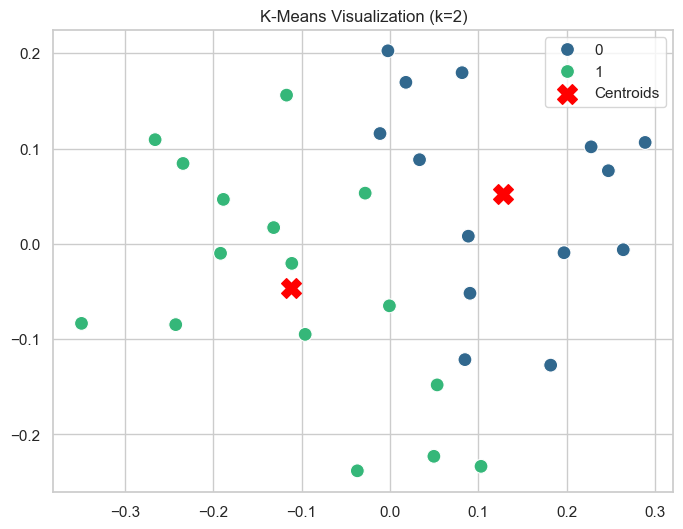


=== 评估指标 ===
类内距离: 0.7619
类间距离: 0.2588
分类精度: 0.7666666666666667
平均熵: 0.5226
平均纯度: 0.7667

第2组初始中心: [[0.697 0.46 ]
 [0.403 0.237]]
算法在第 4 轮迭代后收敛

=== 统计信息 ===

簇 0 (包含 13 个样本): [0, 1, 2, 3, 8, 12, 13, 16, 20, 21, 25, 26, 28]
density: 平均值=0.68, 标准差=0.07
sugar_rate: 平均值=0.30, 标准差=0.14

簇 1 (包含 17 个样本): [4, 5, 6, 7, 9, 10, 11, 14, 15, 17, 18, 19, 22, 23, 24, 27, 29]
density: 平均值=0.41, 标准差=0.10
sugar_rate: 平均值=0.25, 标准差=0.12

=== 可视化 ===


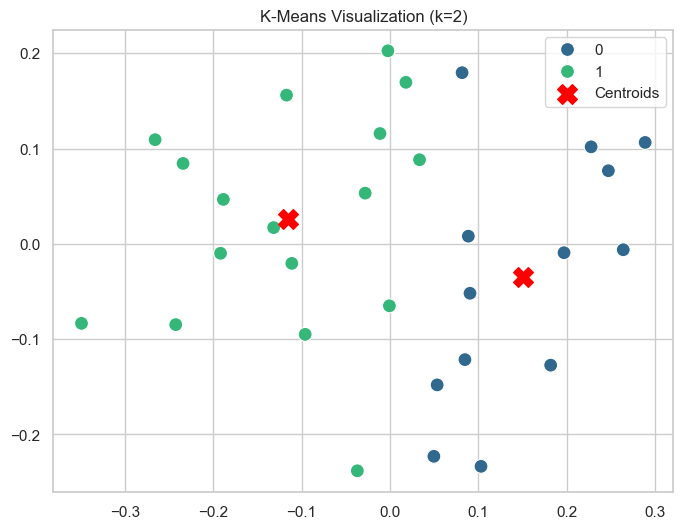


=== 评估指标 ===
类内距离: 0.7155
类间距离: 0.2724
分类精度: 0.5333333333333333
平均熵: 0.6805
平均纯度: 0.5667

第3组初始中心: [[0.556 0.215]
 [0.751 0.489]]
算法在第 6 轮迭代后收敛

=== 统计信息 ===

簇 0 (包含 17 个样本): [4, 5, 6, 7, 9, 10, 11, 14, 15, 17, 18, 19, 22, 23, 24, 27, 29]
density: 平均值=0.41, 标准差=0.10
sugar_rate: 平均值=0.25, 标准差=0.12

簇 1 (包含 13 个样本): [0, 1, 2, 3, 8, 12, 13, 16, 20, 21, 25, 26, 28]
density: 平均值=0.68, 标准差=0.07
sugar_rate: 平均值=0.30, 标准差=0.14

=== 可视化 ===


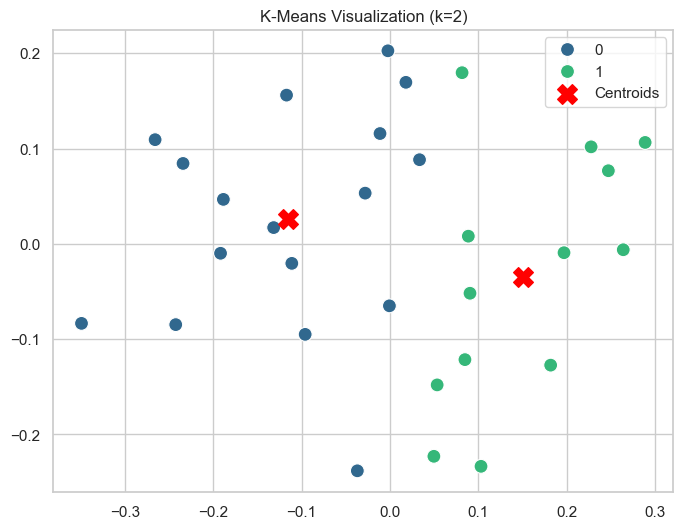


=== 评估指标 ===
类内距离: 0.7155
类间距离: 0.2724
分类精度: 0.5333333333333333
平均熵: 0.6805
平均纯度: 0.5667
k = 3 时：

第1组初始中心: [[0.473 0.376]
 [0.593 0.042]
 [0.478 0.437]]
算法在第 6 轮迭代后收敛

=== 统计信息 ===

簇 0 (包含 11 个样本): [5, 6, 7, 9, 10, 11, 14, 17, 18, 19, 22]
density: 平均值=0.36, 标准差=0.08
sugar_rate: 平均值=0.22, 标准差=0.09

簇 1 (包含 8 个样本): [2, 4, 8, 12, 13, 15, 16, 20]
density: 平均值=0.65, 标准差=0.06
sugar_rate: 平均值=0.16, 标准差=0.07

簇 2 (包含 11 个样本): [0, 1, 3, 21, 23, 24, 25, 26, 27, 28, 29]
density: 平均值=0.61, 标准差=0.12
sugar_rate: 平均值=0.41, 标准差=0.06

=== 可视化 ===


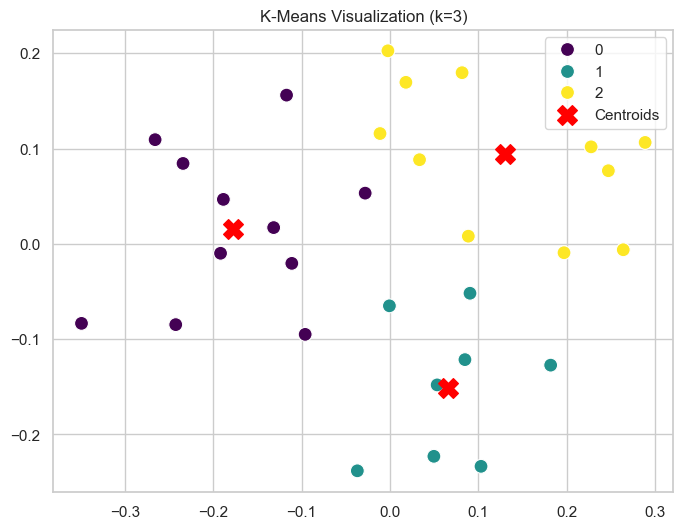


=== 评估指标 ===
类内距离: 0.4114
类间距离: 0.8661
分类精度: Not Defined
平均熵: 0.3903
平均纯度: 0.8000

第2组初始中心: [[0.697 0.46 ]
 [0.403 0.237]
 [0.748 0.232]]
算法在第 3 轮迭代后收敛

=== 统计信息 ===

簇 0 (包含 7 个样本): [0, 1, 3, 21, 25, 26, 28]
density: 平均值=0.69, 标准差=0.08
sugar_rate: 平均值=0.42, 标准差=0.06

簇 1 (包含 15 个样本): [5, 6, 7, 9, 10, 11, 14, 17, 18, 19, 22, 23, 24, 27, 29]
density: 平均值=0.39, 标准差=0.09
sugar_rate: 平均值=0.27, 标准差=0.11

簇 2 (包含 8 个样本): [2, 4, 8, 12, 13, 15, 16, 20]
density: 平均值=0.65, 标准差=0.06
sugar_rate: 平均值=0.16, 标准差=0.07

=== 可视化 ===


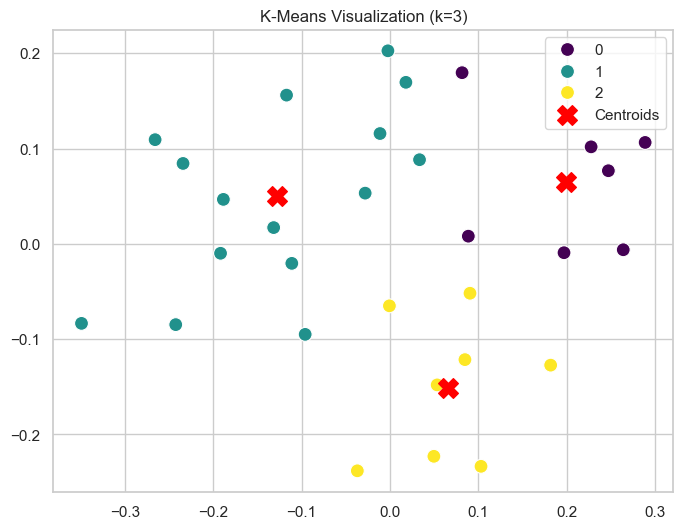


=== 评估指标 ===
类内距离: 0.4550
类间距离: 0.8606
分类精度: Not Defined
平均熵: 0.4954
平均纯度: 0.7000

第3组初始中心: [[0.556 0.215]
 [0.751 0.489]
 [0.245 0.057]]
算法在第 4 轮迭代后收敛

=== 统计信息 ===

簇 0 (包含 15 个样本): [2, 3, 4, 6, 8, 12, 13, 15, 16, 20, 22, 23, 24, 27, 29]
density: 平均值=0.58, 标准差=0.09
sugar_rate: 平均值=0.25, 标准差=0.12

簇 1 (包含 6 个样本): [0, 1, 21, 25, 26, 28]
density: 平均值=0.70, 标准差=0.08
sugar_rate: 平均值=0.43, 标准差=0.05

簇 2 (包含 9 个样本): [5, 7, 9, 10, 11, 14, 17, 18, 19]
density: 平均值=0.33, 标准差=0.06
sugar_rate: 平均值=0.21, 标准差=0.09

=== 可视化 ===


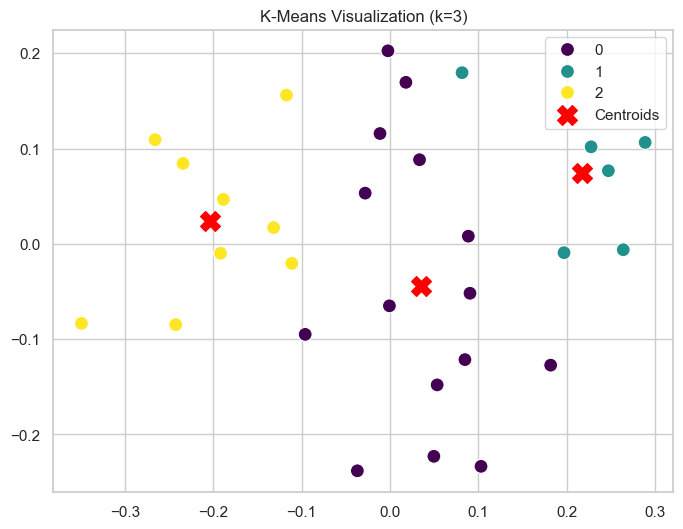


=== 评估指标 ===
类内距离: 0.5186
类间距离: 0.8903
分类精度: Not Defined
平均熵: 0.4954
平均纯度: 0.7333
k = 4 时：

第1组初始中心: [[0.473 0.376]
 [0.593 0.042]
 [0.478 0.437]
 [0.359 0.188]]
算法在第 6 轮迭代后收敛

=== 统计信息 ===

簇 0 (包含 8 个样本): [3, 14, 22, 23, 24, 26, 27, 29]
density: 平均值=0.49, 标准差=0.07
sugar_rate: 平均值=0.39, 标准差=0.06

簇 1 (包含 8 个样本): [2, 4, 8, 12, 13, 15, 16, 20]
density: 平均值=0.65, 标准差=0.06
sugar_rate: 平均值=0.16, 标准差=0.07

簇 2 (包含 5 个样本): [0, 1, 21, 25, 28]
density: 平均值=0.73, 标准差=0.03
sugar_rate: 平均值=0.42, 标准差=0.05

簇 3 (包含 9 个样本): [5, 6, 7, 9, 10, 11, 17, 18, 19]
density: 平均值=0.35, 标准差=0.08
sugar_rate: 平均值=0.19, 标准差=0.07

=== 可视化 ===


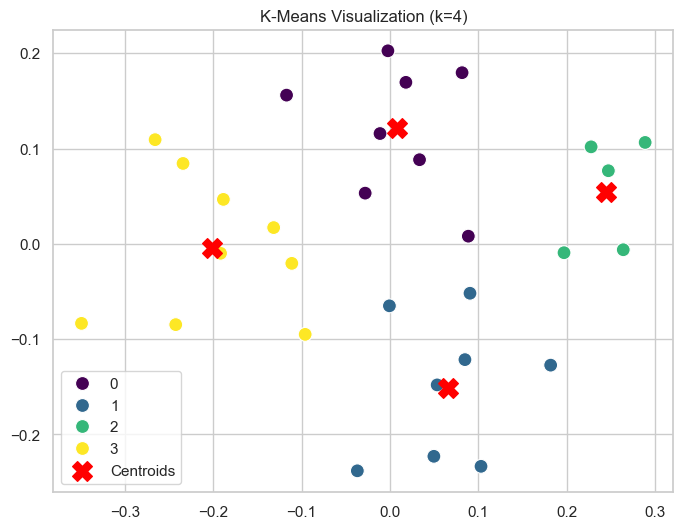


=== 评估指标 ===
类内距离: 0.2479
类间距离: 1.7956
分类精度: Not Defined
平均熵: 0.4414
平均纯度: 0.8000

第2组初始中心: [[0.697 0.46 ]
 [0.403 0.237]
 [0.748 0.232]
 [0.532 0.472]]
算法在第 3 轮迭代后收敛

=== 统计信息 ===

簇 0 (包含 5 个样本): [0, 1, 21, 25, 28]
density: 平均值=0.73, 标准差=0.03
sugar_rate: 平均值=0.42, 标准差=0.05

簇 1 (包含 9 个样本): [5, 6, 7, 9, 10, 11, 17, 18, 19]
density: 平均值=0.35, 标准差=0.08
sugar_rate: 平均值=0.19, 标准差=0.07

簇 2 (包含 9 个样本): [2, 3, 4, 8, 12, 13, 15, 16, 20]
density: 平均值=0.65, 标准差=0.06
sugar_rate: 平均值=0.18, 标准差=0.08

簇 3 (包含 7 个样本): [14, 22, 23, 24, 26, 27, 29]
density: 平均值=0.47, 标准差=0.05
sugar_rate: 平均值=0.40, 标准差=0.05

=== 可视化 ===


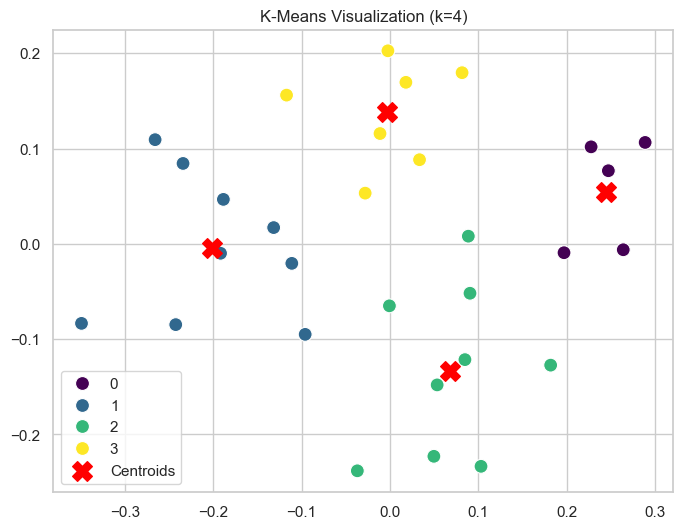


=== 评估指标 ===
类内距离: 0.2486
类间距离: 1.7919
分类精度: Not Defined
平均熵: 0.4776
平均纯度: 0.7667

第3组初始中心: [[0.556 0.215]
 [0.751 0.489]
 [0.245 0.057]
 [0.697 0.46 ]]
算法在第 5 轮迭代后收敛

=== 统计信息 ===

簇 0 (包含 9 个样本): [2, 4, 6, 8, 12, 13, 15, 16, 20]
density: 平均值=0.63, 标准差=0.08
sugar_rate: 平均值=0.16, 标准差=0.07

簇 1 (包含 5 个样本): [0, 1, 21, 25, 28]
density: 平均值=0.73, 标准差=0.03
sugar_rate: 平均值=0.42, 标准差=0.05

簇 2 (包含 8 个样本): [5, 7, 9, 10, 11, 17, 18, 19]
density: 平均值=0.33, 标准差=0.07
sugar_rate: 平均值=0.19, 标准差=0.07

簇 3 (包含 8 个样本): [3, 14, 22, 23, 24, 26, 27, 29]
density: 平均值=0.49, 标准差=0.07
sugar_rate: 平均值=0.39, 标准差=0.06

=== 可视化 ===


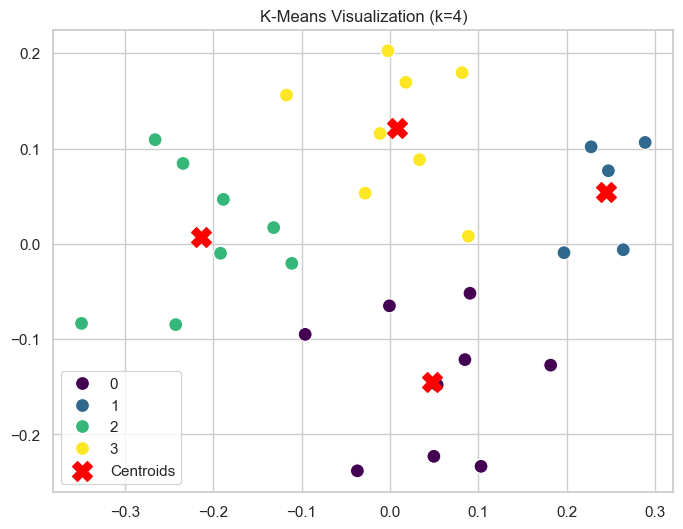


=== 评估指标 ===
类内距离: 0.2521
类间距离: 1.8100
分类精度: Not Defined
平均熵: 0.4414
平均纯度: 0.8000


In [ ]:
k_values = [2, 3, 4]

for k in k_values:
    print(f"k = {k} 时：")
    initial_centroids_list = generate_initial_centroids(features, k)
    
    for i, init_centroids in enumerate(initial_centroids_list, 1):
        print(f'\n第{i}组初始中心: {init_centroids}')
        evaluate(features, k, init_centroids, labels,feature_names=feature_names)


k = 2 时，第1组初始中心: [[0.473 0.376]
 [0.593 0.042]]
算法在第 8 轮迭代后收敛

=== 统计信息 (k=2, 初始组=[[0.473 0.376]
 [0.593 0.042]]) ===

簇 0 (包含 14 个样本): [0, 1, 2, 3, 13, 20, 21, 23, 24, 25, 26, 27, 28, 29]
density: 平均值=0.63, 标准差=0.11
sugar_rate: 平均值=0.37, 标准差=0.09

簇 1 (包含 16 个样本): [4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 22]
density: 平均值=0.45, 标准差=0.15
sugar_rate: 平均值=0.19, 标准差=0.09

=== 评估指标 ===
类内距离: 0.7619
类间距离: 0.2588
分类精度: 0.7666666666666667
平均熵: 0.5226
平均纯度: 0.7667

k = 2 时，第2组初始中心: [[0.697 0.46 ]
 [0.403 0.237]]
算法在第 4 轮迭代后收敛

=== 统计信息 (k=2, 初始组=[[0.697 0.46 ]
 [0.403 0.237]]) ===

簇 0 (包含 13 个样本): [0, 1, 2, 3, 8, 12, 13, 16, 20, 21, 25, 26, 28]
density: 平均值=0.68, 标准差=0.07
sugar_rate: 平均值=0.30, 标准差=0.14

簇 1 (包含 17 个样本): [4, 5, 6, 7, 9, 10, 11, 14, 15, 17, 18, 19, 22, 23, 24, 27, 29]
density: 平均值=0.41, 标准差=0.10
sugar_rate: 平均值=0.25, 标准差=0.12

=== 评估指标 ===
类内距离: 0.7155
类间距离: 0.2724
分类精度: 0.5333333333333333
平均熵: 0.6805
平均纯度: 0.5667

k = 2 时，第3组初始中心: [[0.556 0.215]
 [0.751 0.489]]
算

C:\Users\Jiazhen Huang\AppData\Local\Temp\ipykernel_37520\2844686739.py:122: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\Jiazhen Huang\AppData\Local\Temp\ipykernel_37520\2844686739.py:122: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\Jiazhen Huang\AppData\Local\Temp\ipykernel_37520\2844686739.py:122: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\Jiazhen Huang\AppData\Local\Temp\ipykernel_37520\2844686739.py:122: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
d:\anaconda3\envs\pytorch_tf\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) Arial.
  fig.c

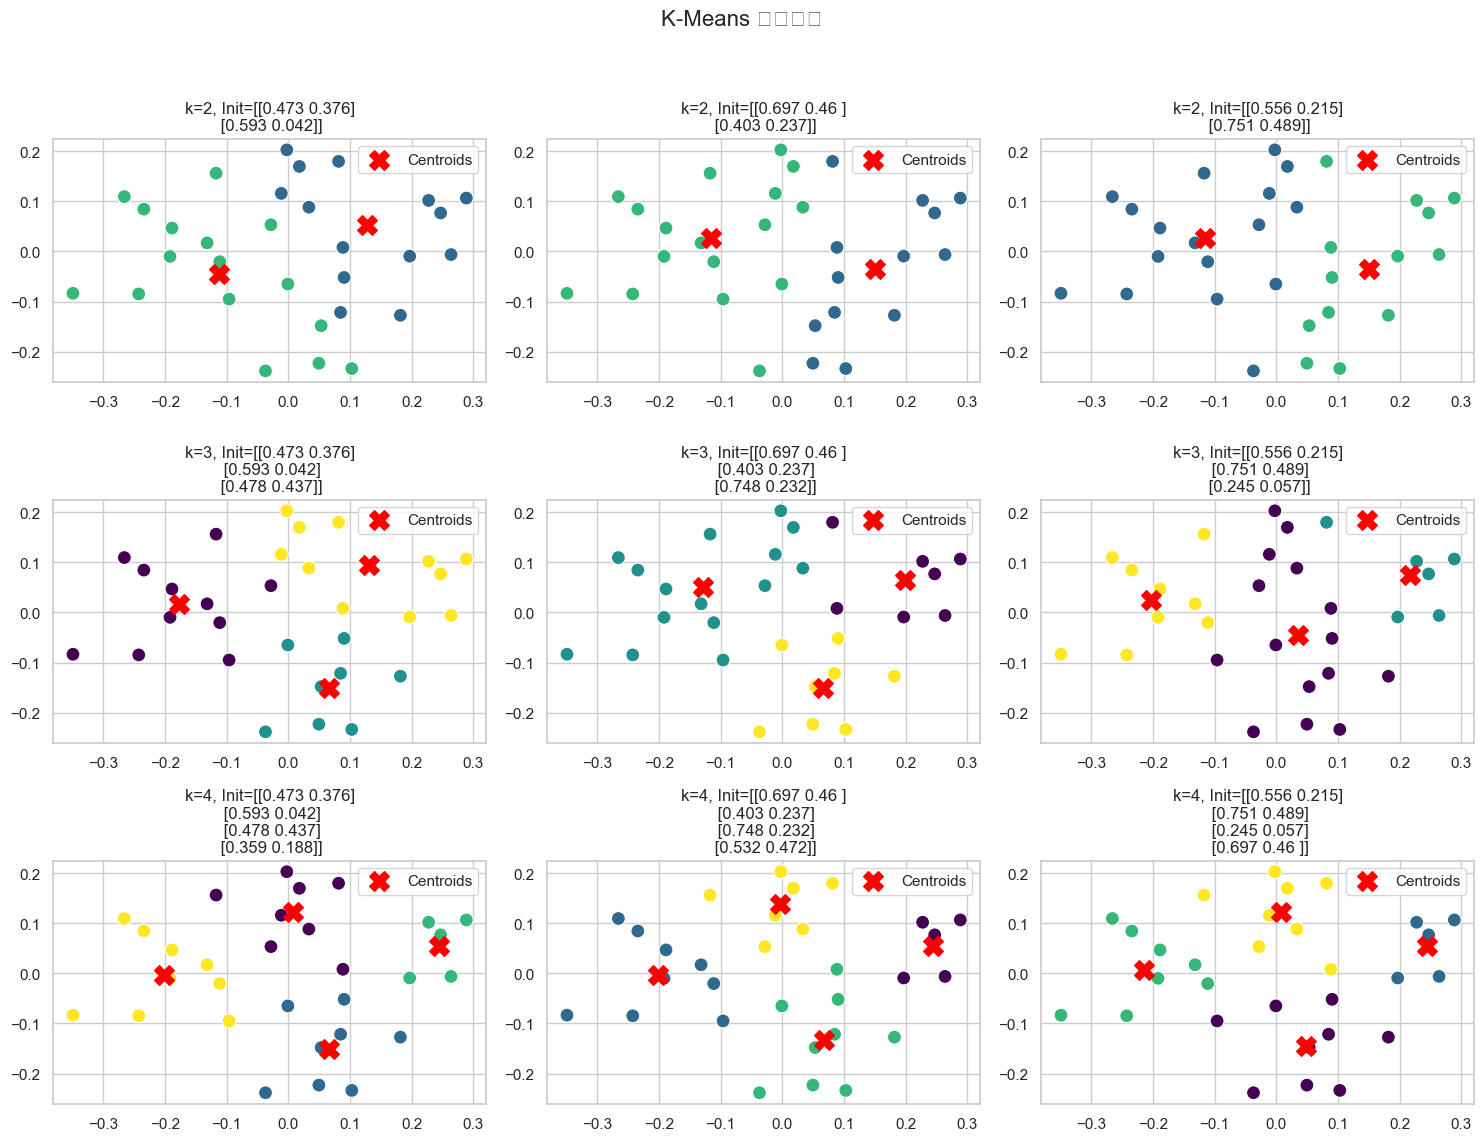

In [23]:

# 假设 MyKMeans 已定义
# from my_kmeans_module import MyKMeans

# 评估函数
def evaluate_1(X, k, initial_centroids, labels_gt, feature_names=None, ax=None):
    # 运行算法
    kmeans = MyKMeans(n_clusters=k, init_centroids=initial_centroids)
    kmeans.fit(X)
    labels_pred = kmeans.labels_
    centroids = kmeans.centroids
    
    # 1. 基本统计信息
    print(f"\n=== 统计信息 (k={k}, 初始组={initial_centroids}) ===")
    for i in range(k):
        cluster_indices = np.where(labels_pred == i)[0]
        cluster_size = len(cluster_indices)
        print(f"\n簇 {i} (包含 {cluster_size} 个样本): {cluster_indices.tolist()}")
        
        # 计算每个特征的统计量
        if feature_names:
            for idx in range(X.shape[1]):
                feature_name = feature_names.get(idx, f"{idx}")
                values = X[cluster_indices, idx]
                print(f"{feature_name}: 平均值={np.mean(values):.2f}, 标准差={np.std(values):.2f}")

    # 2. 散点图可视化聚类结果
    if ax is not None:
        pca = PCA(n_components=2) # 降维以供可视化
        X_r = pca.fit_transform(X)
        
        scatter = sns.scatterplot(x=X_r[:,0], y=X_r[:,1], hue=labels_pred, palette='viridis', s=100, ax=ax, legend=False)
        centroids_r = pca.transform(centroids)
        ax.scatter(centroids_r[:,0], centroids_r[:,1], c='red', marker='X', s=200, label='Centroids')
        ax.set_title(f'k={k}, Init={initial_centroids}')
        ax.legend()

    # 3. 计算评估指标
    # 簇内平方和
    inertia = 0
    for idx in range(k):
        cluster_points = X[labels_pred == idx]
        if len(cluster_points) > 0:
            inertia += np.sum((cluster_points - centroids[idx])**2)
            
    # 簇间距离
    total_centroid_dist = 0
    for i in range(k):
        for j in range(i+1, k):
            dist = np.linalg.norm(centroids[i] - centroids[j])
            total_centroid_dist += dist

    # 分类精度（k=2的情况）
    if k == 2:
        labels_pred_swapped = np.where(labels_pred == 0, 1, 0)
        accuracy_0 = accuracy_score(labels_gt, labels_pred)
        accuracy_1 = accuracy_score(labels_gt, labels_pred_swapped)
        accuracy = max(accuracy_0, accuracy_1)
    else:
        accuracy = 'Not Defined'
    
    # 计算平均熵和纯度
    avg_entropy = 0
    avg_purity = 0
    
    for i in range(k):
        cluster_mask = (labels_pred == i)
        cluster_size = np.sum(cluster_mask)
        
        if cluster_size > 0:
            true_labels_in_cluster = labels_gt[cluster_mask]
            unique_labels, counts = np.unique(true_labels_in_cluster, return_counts=True)
            proportions = counts / cluster_size
            
            avg_entropy += entropy(proportions) * (cluster_size / len(X))
            avg_purity += np.max(proportions) * (cluster_size / len(X))
    
    # 输出评估指标
    print("\n=== 评估指标 ===")
    print(f"类内距离: {inertia:.4f}")
    print(f"类间距离: {total_centroid_dist:.4f}")
    print(f"分类精度: {accuracy}")
    print(f"平均熵: {avg_entropy:.4f}")
    print(f"平均纯度: {avg_purity:.4f}")
    
    return labels_pred, centroids

# 随机生成三组初始化中心，每组k个
def generate_initial_centroids(features, k, n_groups=3, random_seed=42):
    np.random.seed(random_seed)
    n_samples = len(features)
    
    initial_centroids_list = []
    
    for _ in range(n_groups):
        indices = np.random.choice(n_samples, k, replace=False)
        centroids = features[indices].copy()
        initial_centroids_list.append(centroids)
    
    return initial_centroids_list

# 假设 features, labels, feature_names, config_para 已定义
# features = np.array(...) 
# labels = np.array(...)
# feature_names = {0: 'Feature1', 1: 'Feature2', ...}
# config_para = {'seed': 42}

k_values = [2, 3, 4]
n_initializations = 3

# 创建一个 3x3 的子图网格
fig, axes = plt.subplots(len(k_values), n_initializations, figsize=(5 * n_initializations, 4 * len(k_values)))
fig.suptitle('K-Means 聚类结果', fontsize=16)

for row, k in enumerate(k_values):
    initial_centroids_list = generate_initial_centroids(features, k, n_groups=n_initializations, random_seed=config_para['seed'])
    
    for col, init_centroids in enumerate(initial_centroids_list):
        print(f"\nk = {k} 时，第{col+1}组初始中心: {init_centroids}")
        evaluate_1(features, k, init_centroids, labels, feature_names=feature_names, ax=axes[row, col])

# 调整子图布局
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()